## Sự thay đổi của lượt tương tác của từng bài viết theo ngày

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
analyze_df = pd.read_csv('reactions_data.csv')

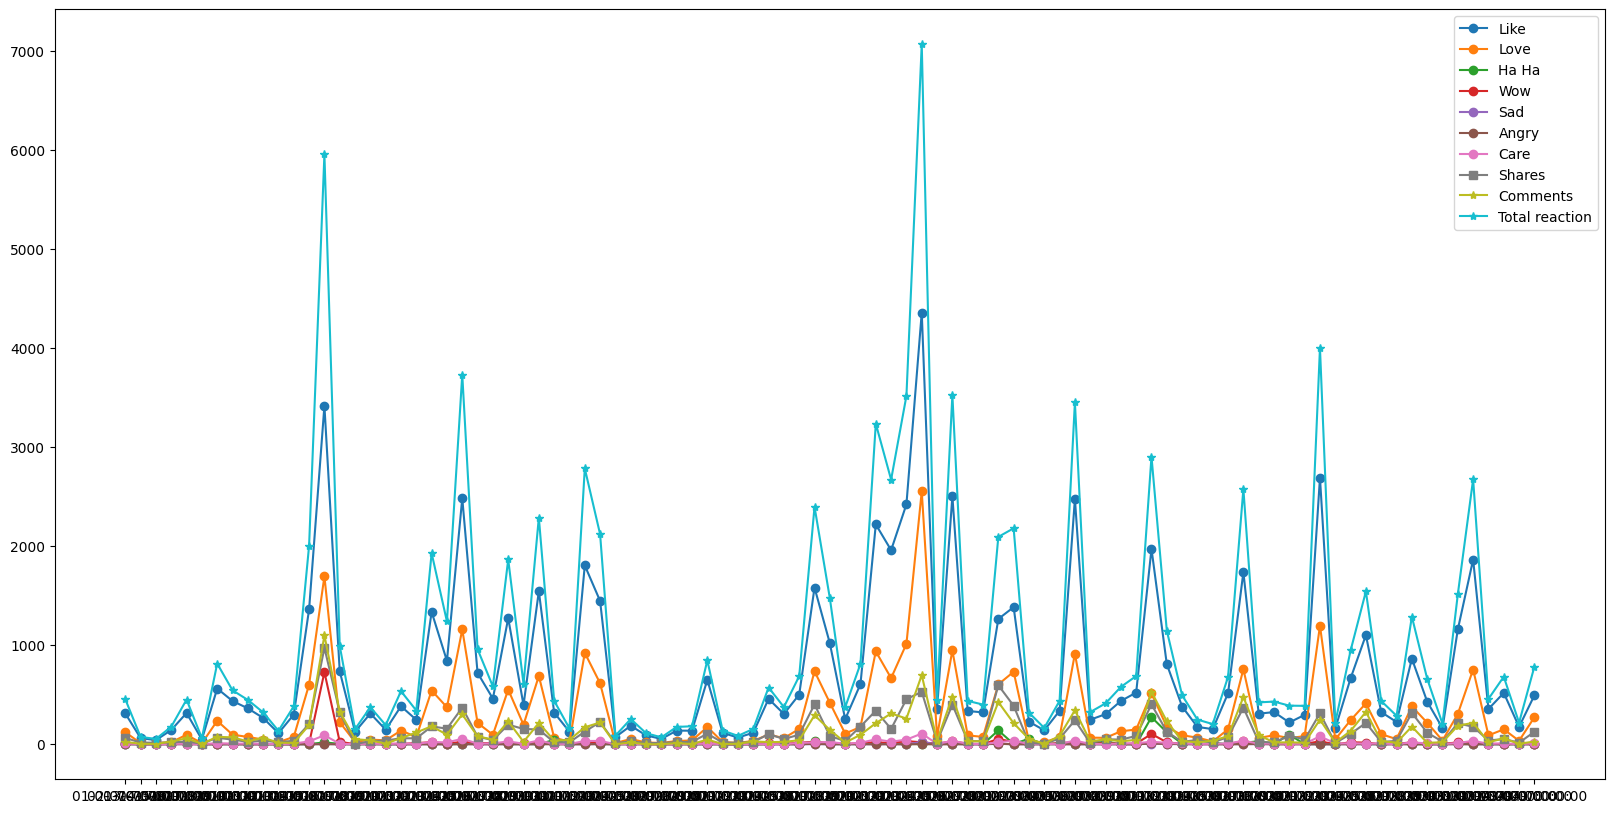

In [45]:

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(analyze_df['time'], analyze_df['like'], label = "Like", marker="o")
ax.plot(analyze_df['time'], analyze_df['love'], label = "Love", marker="o")
ax.plot(analyze_df['time'], analyze_df['haha'], label = "Ha Ha", marker="o")
ax.plot(analyze_df['time'], analyze_df['wow'], label = "Wow", marker="o")
ax.plot(analyze_df['time'], analyze_df['sad'], label = "Sad", marker="o")
ax.plot(analyze_df['time'], analyze_df['angry'], label = "Angry", marker="o")
ax.plot(analyze_df['time'], analyze_df['care'], label = "Care", marker="o")
ax.plot(analyze_df['time'], analyze_df['shares'], label = "Shares", marker="s")
ax.plot(analyze_df['time'], analyze_df['comments'], label = "Comments", marker="*")
ax.plot(analyze_df['time'], analyze_df['reaction_count'], label = "Total reaction", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

## Bài viết có lượt tương tác lớn nhất trong bộ dữ liệu

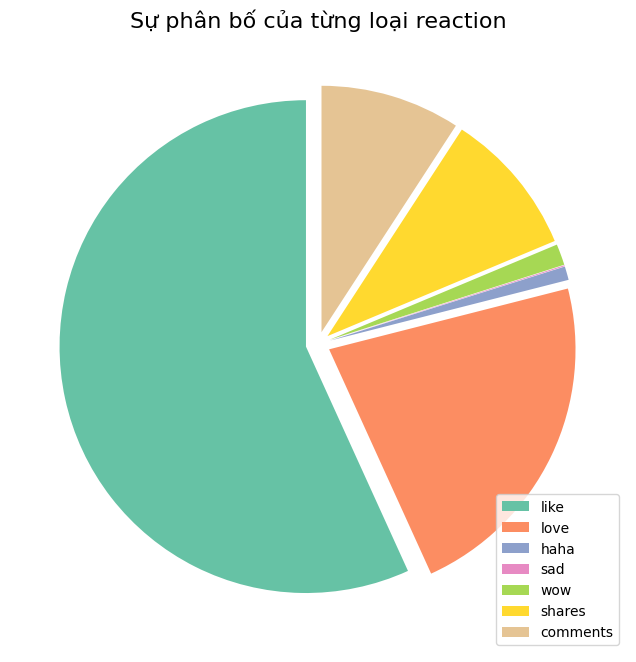

In [46]:
reaction_total = pd.read_csv('reactions_data.csv')
keys = ['like', 'love', 'haha', 'sad', 'wow','shares','comments']
values = [reaction_total[key].sum() for key in keys]

colors = plt.cm.Set2(range(len(keys)))

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05]

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(values, labels=None, autopct='', startangle=90, colors=colors, explode=explode)

plt.legend(patches, keys, loc='best')
for text, autotext, color in zip(texts, autotexts, colors):
    text.set_color(color)
    autotext.set_color('white') 

plt.title('Sự phân bố của từng loại reaction', fontsize=16)

plt.show()



10 bài viết có lượng tương tác cao nhất

In [47]:
reaction_total['total_reactions'] = reaction_total['reaction_count'] + reaction_total['comments']
top10_posts = reaction_total.nlargest(20, 'total_reactions')[['post_text', 'comments', 'reaction_count']]

top10_posts

,post_text,comments,reaction_count
52,The Mario Kart 8 Deluxe - Booster Course Pass ...,698,7068
13,Adventure calls in the galaxy of Jet Force Gem...,1100,5957
78,"With overhauled graphics and new cutscenes, th...",249,4002
22,Wa-hoo! Super Mario RPG is out now!,302,3732
54,Wave 6 of the Mario Kart 8 Deluxe – Booster Co...,482,3525
62,Time to take the scenic route! Gear up to crui...,344,3454
51,Bwa ha ha! Only 1 week until Super Mario RPG c...,260,3518
49,Sweet! Super Mario RPG is coming to Nintendo S...,213,3237
67,The Nintendo Switch – OLED Model system + Supe...,530,2905
73,Buckle up! Four new characters race onto the s...,477,2578


## Tương quan của các lượt reactions so với các trường khác

### Trường shares

In [48]:
print(analyze_df[['like','love','haha','wow','sad','angry','care']].corrwith(analyze_df['shares']))

like     0.845705
love     0.832125
haha     0.288043
wow      0.662181
sad      0.432887
angry    0.408918
care     0.805976
dtype: float64


### Trường comment

In [49]:
print(analyze_df[['like','love','haha','wow','sad','angry','care']].corrwith(analyze_df['comments']))

like     0.869699
love     0.843351
haha     0.319457
wow      0.699788
sad      0.524623
angry    0.433335
care     0.811622
dtype: float64


## Thời gian đăng bài phổ biến

C:\Users\84853\AppData\Local\Temp\ipykernel_2172\642083999.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, order=sorted(counts.index), palette=colors)


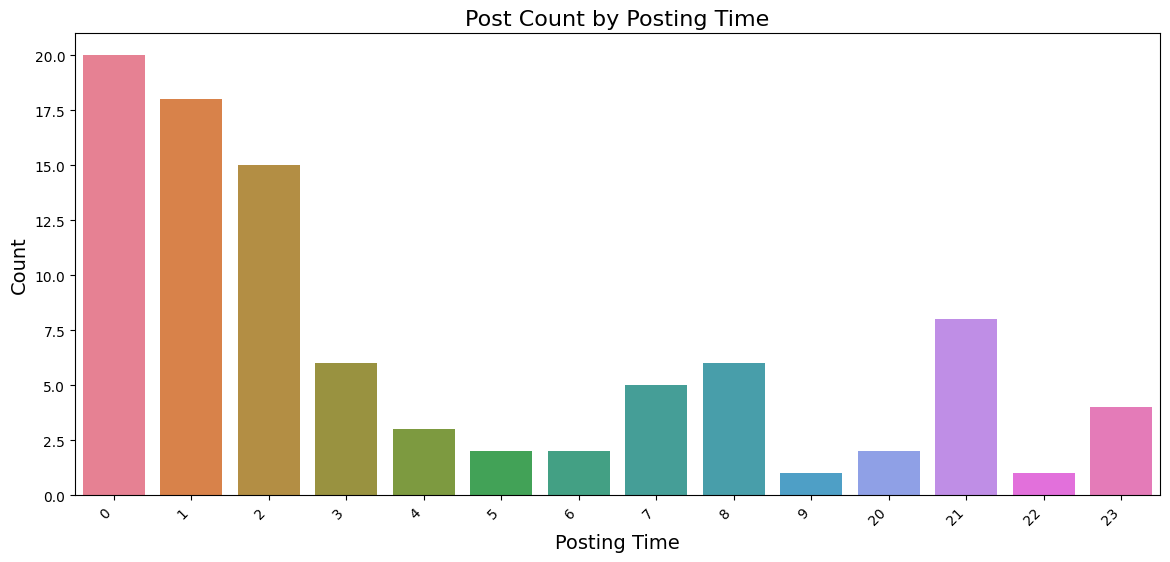

In [50]:

# Lấy giá trị đếm và sắp xếp theo thứ tự
counts = analyze_df['hour'].value_counts()

# Màu sắc cho các cột
colors = sns.color_palette("husl", n_colors=len(counts))

# Vẽ biểu đồ với sắp xếp xlabel theo thứ tự
plt.figure(figsize=(14, 6))
sns.barplot(x=counts.index, y=counts.values, order=sorted(counts.index), palette=colors)

# Thêm tiêu đề và chú thích
plt.title('Post Count by Posting Time', fontsize=16)
plt.xlabel('Posting Time', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Định dạng trục x nếu có quá nhiều giờ
plt.xticks(rotation=45, ha='right')

plt.show()


Giờ đăng bài phổ biến

C:\Users\84853\AppData\Local\Temp\ipykernel_2172\919970490.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)
C:\Users\84853\AppData\Local\Temp\ipykernel_2172\919970490.py:9: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)


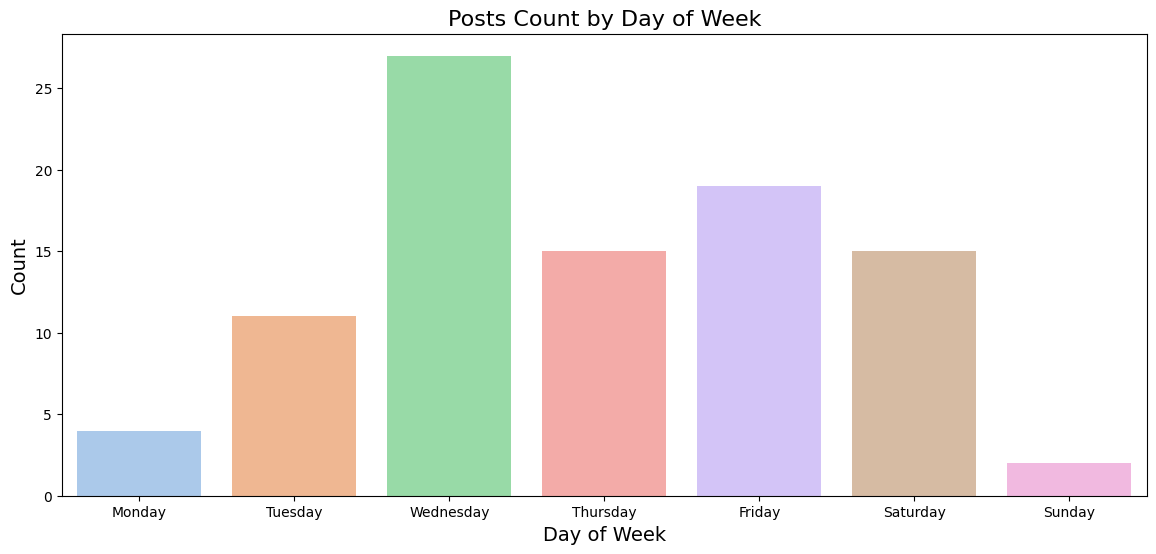

In [51]:
# Lấy giá trị đếm và sắp xếp theo thứ tự
counts = analyze_df['Day'].value_counts()

# Màu sắc cho các cột
colors = sns.color_palette("pastel")

# Vẽ biểu đồ với sắp xếp xlabel theo thứ tự
plt.figure(figsize=(14, 6))
sns.barplot(x=counts.index, y=counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=colors)

# Thêm tiêu đề và chú thích
plt.title('Posts Count by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

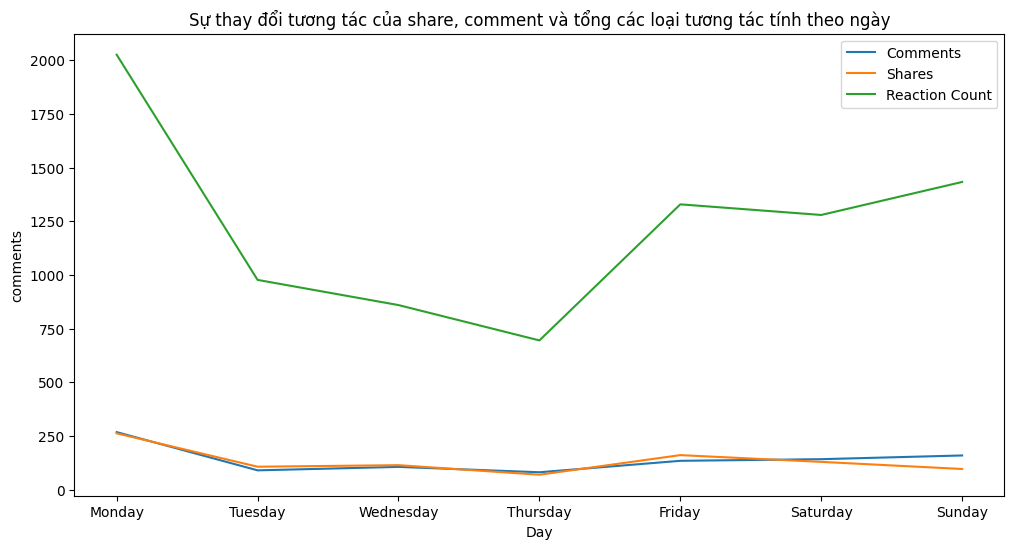

In [52]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
analyze_df['Day'] = pd.Categorical(analyze_df['Day'], categories=day_order, ordered=True)

plt.figure(figsize=(12, 6))

sns.lineplot(data=analyze_df, x="Day", y="comments", err_style=None, hue_order=day_order, label='Comments')
sns.lineplot(data=analyze_df, x="Day", y="shares", err_style=None, hue_order=day_order, label='Shares')
sns.lineplot(data=analyze_df, x="Day", y="reaction_count", err_style=None, hue_order=day_order, label='Reaction Count')

plt.title('Sự thay đổi tương tác của share, comment và tổng các loại tương tác tính theo ngày')
plt.legend()
plt.show()

## Tìm từ khóa của các posts của Nintendo Switch

In [53]:
df_text = analyze_df[['post_id','post_text']]
text    = str(df_text['post_text'])

In [54]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

Phân tích comments

In [ ]:
path = 'Data/NintendoSwitch.npy'
post_list = np.load(path, allow_pickle = True)

In [ ]:
post_list=post_list.tolist()

In [ ]:
res=[]
for post in post_list:
    if len(post['comments_full']) > 0:
      cmt = '\n'.join([comment['comment_text'] for comment in post['comments_full'] ])
      res.append(cmt)
print(len(res))


91


In [ ]:
text=""
for i in res:
  text=text+i+" . "
text

'2 pikmin ones? Im down. Well the second is holding the candle from zelda 2\nInteresting, reminds me of the 3DS themes we used to get\nChristmas themed Xenoblade and Fire Emblem please\nWish we got some N64 icons, but these are nice\nI thought that was a "No Yoshis" icon at first. 😂\nAwesome\nBeatrice Guison Sol Cruz\nHannah Fox Duncan\nEmily Scott Kyle Shane Grimm\nMegan Grafton\nMelissa Paredes Granda\nSarah Jury\nNathaniel Darrell O\'Connor Miller\nBilly Guevara\nLucas Gutierrez\nCandice Soto Deluna\nDavid Sandoval\nSteven Cook\nRob Marcos\nFercho Orellana pilas pues !\nJoe\nJazmin Wingfield look ! . Any chance Dream Buffett and Mario RPG themes come back, I missed them? I thought they added the ability to purchase them with tickets but I can’t find out how\nWhoa. Two in a row. This is a fun game with these updates\nWhy no Zelda totk theme?\nFabian Nunez Rodriguez . Ken Eschbach\nWoo hoo! 👏\n許嘉 . Most dissapointing game of the year right there\nWhen will you guys Release the Game "P

In [ ]:
%pip install -U nltk
%pip install rake-nltk

Note: you may need to restart the kernel to use updated packages.



In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\84853\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\84853\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\84853\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

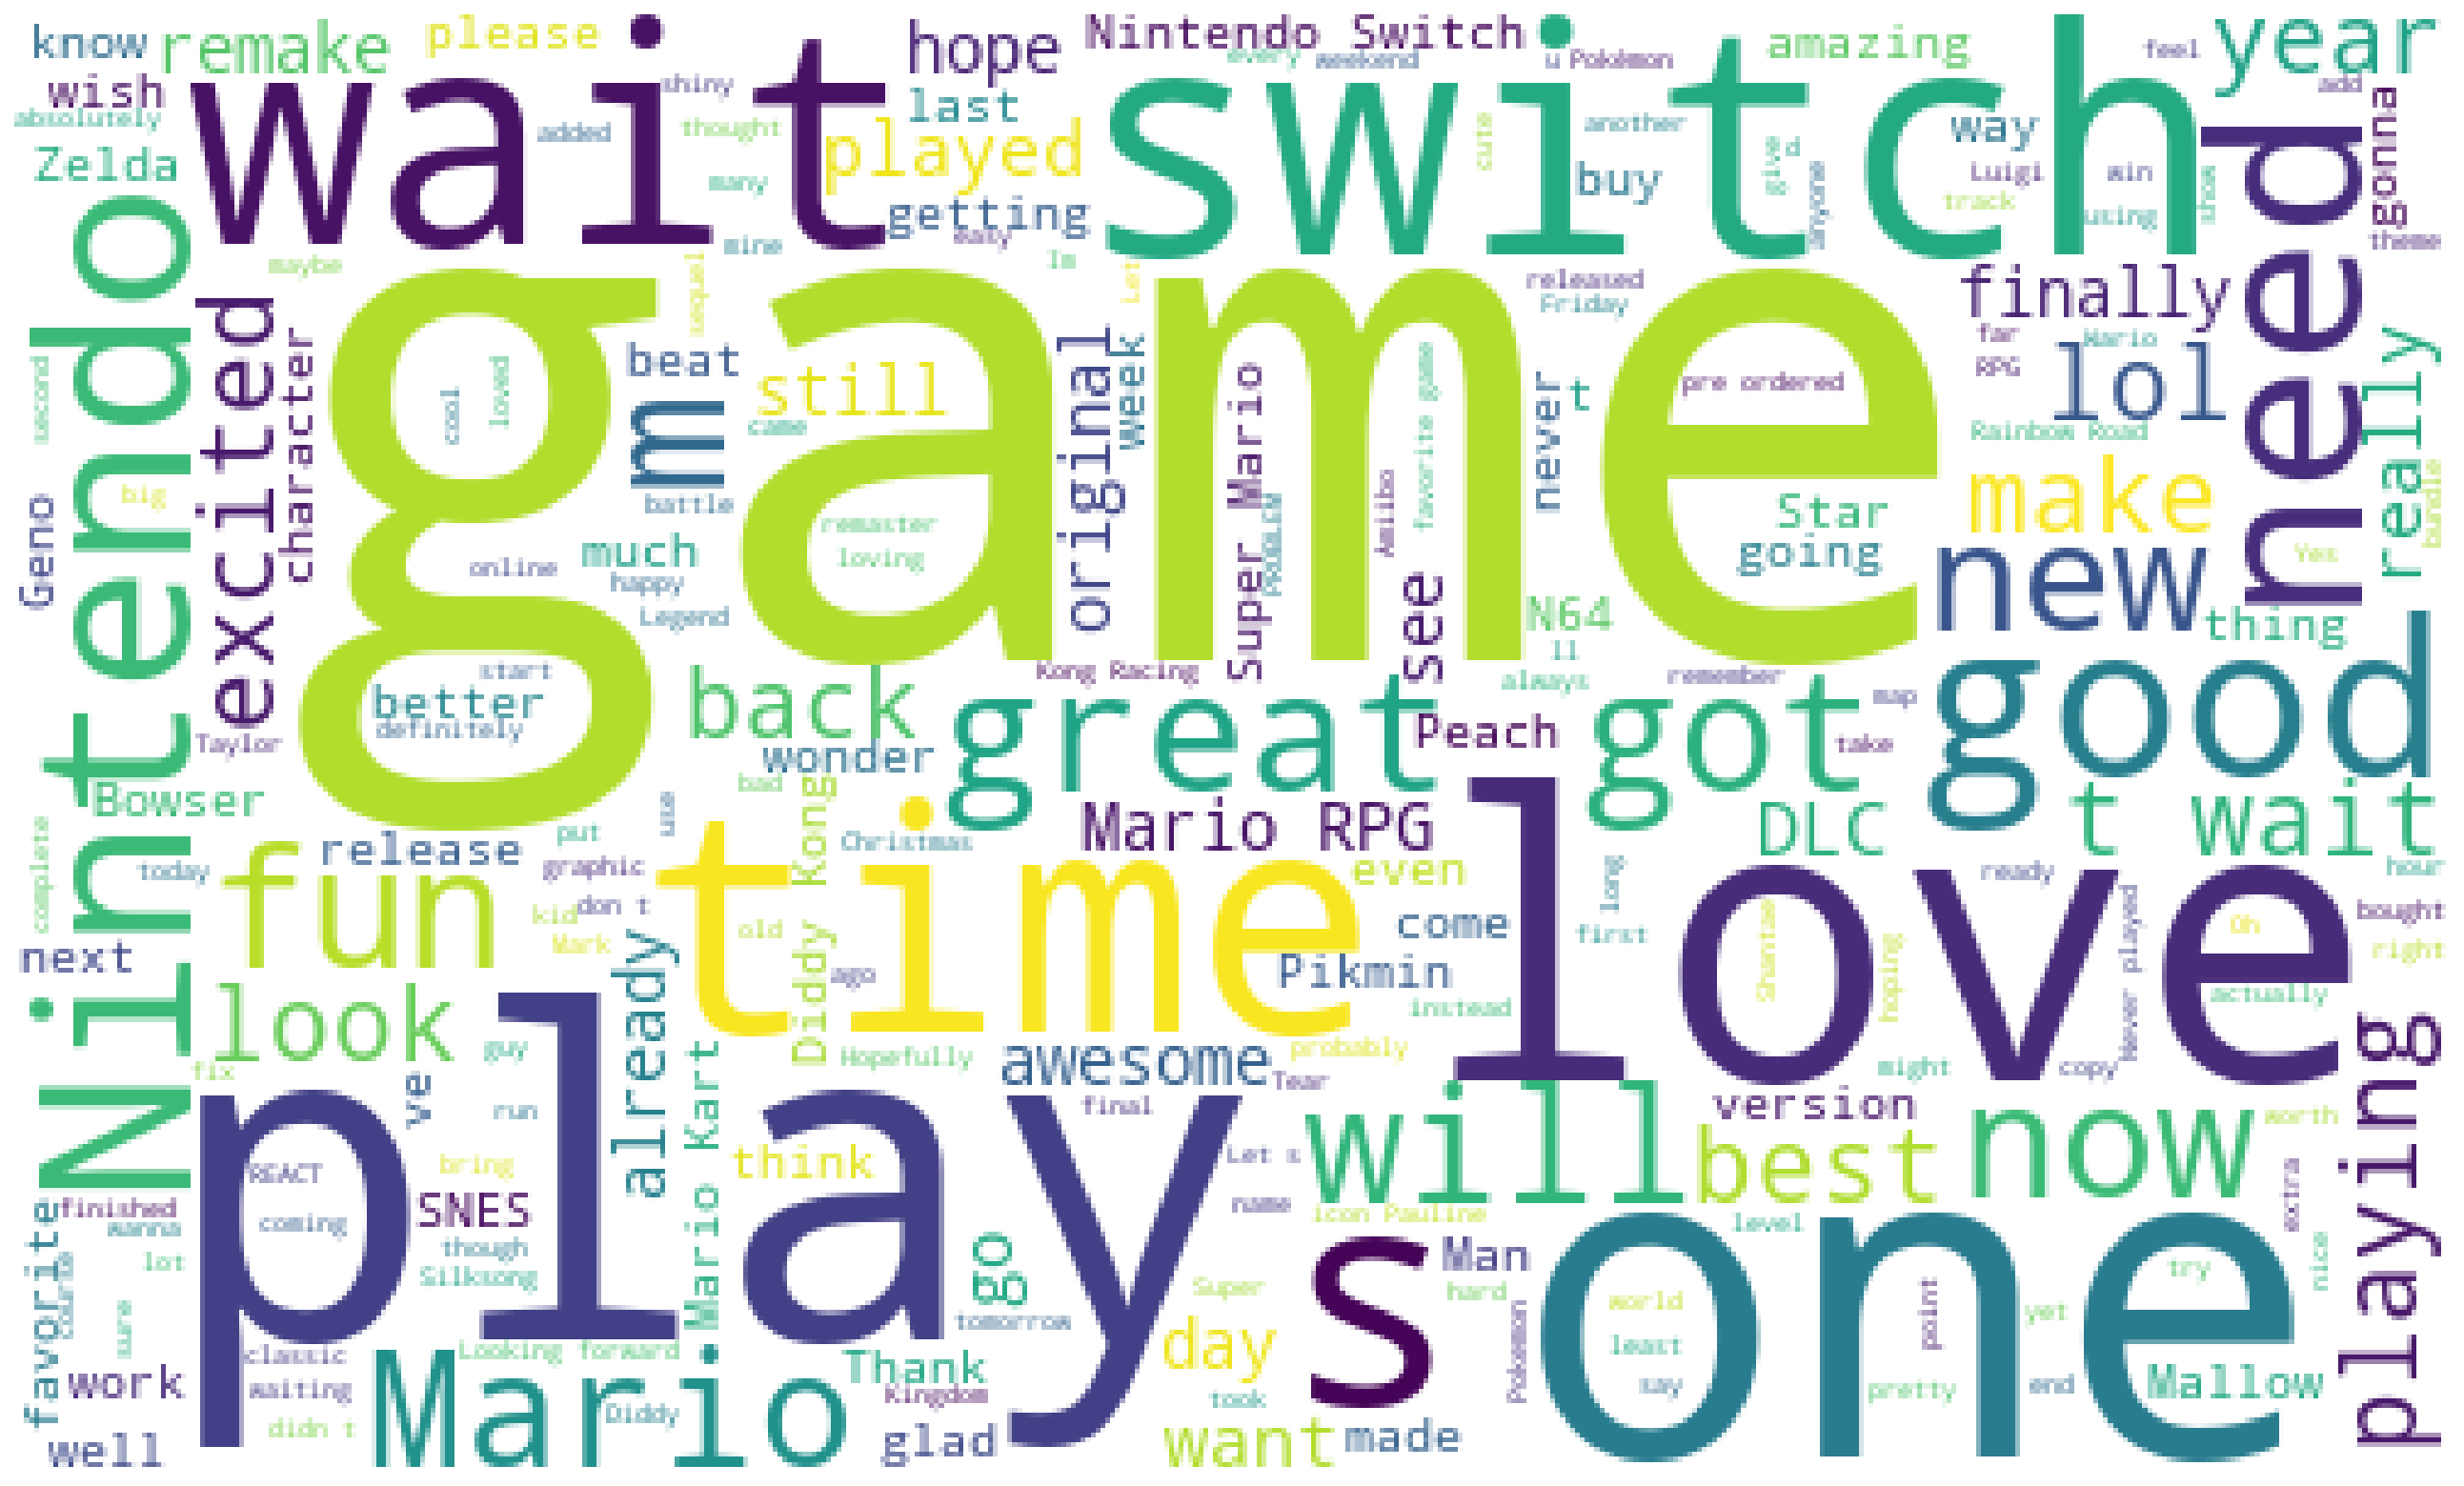

In [ ]:
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()